In [1]:
import torch
# 张量tensor  随机初始化
x = torch.rand(4,3)
print(x)

tensor([[8.0312e-01, 1.8835e-01, 7.2860e-02],
        [5.3764e-01, 8.6787e-01, 6.5688e-01],
        [3.6765e-02, 4.5414e-01, 9.5677e-01],
        [5.1045e-02, 4.9063e-01, 6.8367e-04]])


In [2]:
# 初始化全零 张量
a = torch.zeros(4,4，dtype=torch.long)
print(a)
#初始化全一 张量
b = torch.ones(4,4)
print(b)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


常见构造Tensor的方法：
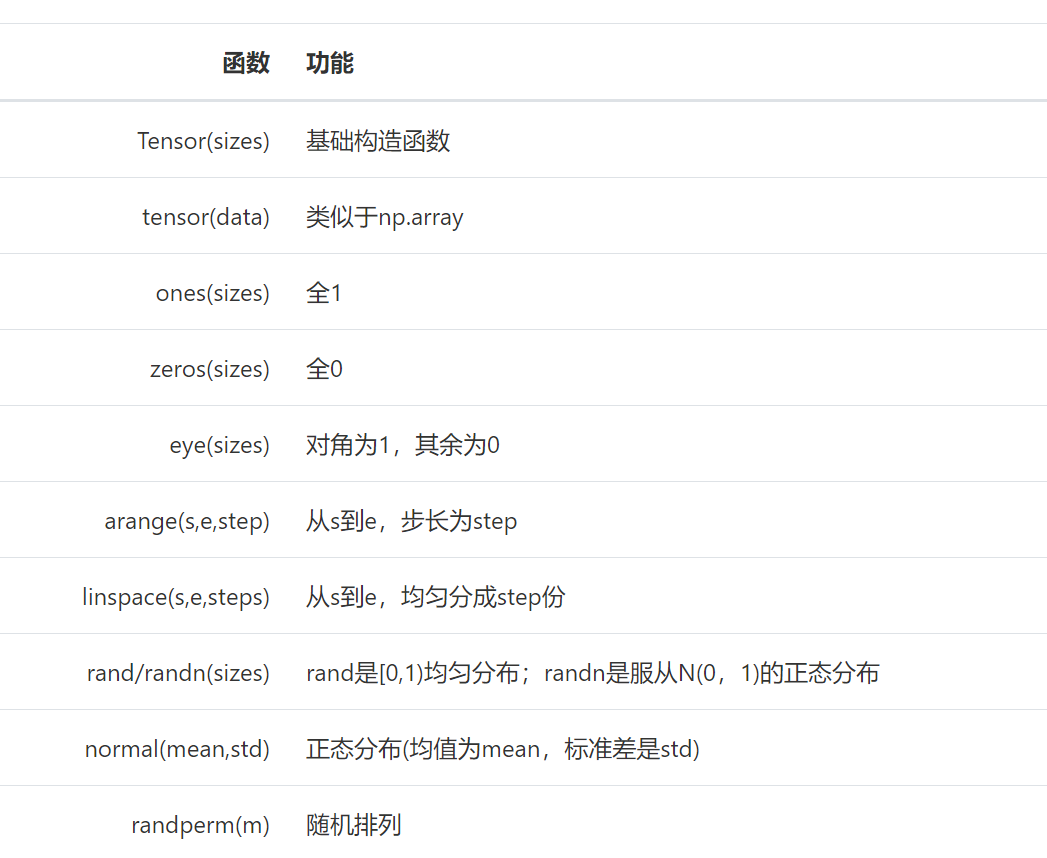

In [5]:
# tensor 的基本操作
# 加法
print(a+b)
# add_ = replace in 操作
y = a.add_(3)
print(y)

tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


In [6]:
#索引操作
x = torch.rand(3,4)
print(x)
# 第二列
print(x[:,1])
# 第二行
print(x[1,:])


tensor([[0.6011, 0.4939, 0.6425, 0.0351],
        [0.5621, 0.2682, 0.0720, 0.4585],
        [0.2699, 0.3680, 0.3615, 0.8789]])
tensor([0.4939, 0.2682, 0.3680])
tensor([0.5621, 0.2682, 0.0720, 0.4585])


In [7]:
y = x+1
print(y[1,:])


tensor([1.5621, 1.2682, 1.0720, 1.4585])


In [14]:
#维度变换 张量的维度变换常见的方法有torch.view()和torch.reshape()
x = torch.randn(4,3)
y = x.view(12)
z = x.view(-1,6)
print(x.size(),y.size(),z.size())
print(x)
print(z)
# 最后x tensor size 没有发生改变
#view()仅仅是改变了对这个张量的观察角度
print(x)

torch.Size([4, 3]) torch.Size([12]) torch.Size([2, 6])
tensor([[-0.4338, -1.3943,  1.8435],
        [ 0.0662, -0.7014,  0.4464],
        [-0.5316,  1.8553,  0.3988],
        [-0.3641, -0.2232,  0.2595]])
tensor([[-0.4338, -1.3943,  1.8435,  0.0662, -0.7014,  0.4464],
        [-0.5316,  1.8553,  0.3988, -0.3641, -0.2232,  0.2595]])
tensor([[-0.4338, -1.3943,  1.8435],
        [ 0.0662, -0.7014,  0.4464],
        [-0.5316,  1.8553,  0.3988],
        [-0.3641, -0.2232,  0.2595]])


In [25]:
#我们希望原始张量和变换后的张量互相不影响。为为了使创建的张量和原始张量不共享内存，我们需要使用第二种方法torch.reshape()， 
#同样可以改变张量的形状，但是此函数并不能保证返回的是其拷贝值，所以官方不推荐使用
a = torch.randn(4,4)
b = a.reshape(2,8)
print(a)
print(b)


tensor([[-0.0617,  2.3109,  0.0030,  0.6941],
        [ 0.4677, -1.9160,  0.6614, -1.7743],
        [-0.3349,  0.2371,  2.1070, -1.0076],
        [ 0.3823, -1.2401, -0.3766, -1.0454]])
tensor([[-0.0617,  2.3109,  0.0030,  0.6941,  0.4677, -1.9160,  0.6614, -1.7743],
        [-0.3349,  0.2371,  2.1070, -1.0076,  0.3823, -1.2401, -0.3766, -1.0454]])


In [29]:
#广播机制
#当对两个形状不同的 Tensor 按元素运算时，可能会触发广播(broadcasting)机制：先适当复制元素使这两个 Tensor 形状相同后再按元素运算。
x = torch.arange(1,4).view(1,3)
print(x)
y = torch.arange(1,5).view(4,1)
print(y)
print(x+y)


tensor([[1, 2, 3]])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([[2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7]])


## 2 自动求导
所有神经网络的核心是 autograd 包。autograd包为张量上的所有操作提供了自动求导机制
- autograd的求导机制

- 梯度的反向传播